# Problem statement

##### We are provided with information about people on the titanic .Based on the given data apply different machine learning algorithms to predict which passengers survived the tragedy

In [1]:
#importing libraries and data
import pandas as pd
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#variable identification 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harper, Mr. Henry Sleeper",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
data.shape

(891, 12)

by comparing number of rows in the dataset and count for each variable we conclude that (age, cabin, embarked) columns have missing values

In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
#creating a dataframe havings columns as unique count and datatype for each variable
temp=pd.DataFrame({'nunique':data.nunique(), 'dtypes': data.dtypes , 'missing' : data.isnull().sum()})
temp

,nunique,dtypes,missing
PassengerId,891,int64,0
Survived,2,int64,0
Pclass,3,int64,0
Name,891,object,0
Sex,2,object,0
Age,88,float64,177
SibSp,7,int64,0
Parch,7,int64,0
Ticket,681,object,0
Fare,248,float64,0


as the unique count is less for (survived and Pclass , SibSp , Parch ) we change the category of those variables.


we now perform univariate analysis on each variable and then do all the required changes including imputing missing values and changing categories 

## Univariate analysis

* categorical variables: (Name , Sex , Ticket , Cabin , Embarked , '''Pclass , SibSp , Parch ''')

* tabular method - frequency table - mistakes in spellings can be found
* graphical method - bar plot 

In [7]:
#name 

data['Name'].value_counts()

Harper, Mr. Henry Sleeper                     1
Lines, Miss. Mary Conover                     1
Torber, Mr. Ernst William                     1
Hickman, Mr. Stanley George                   1
Doharr, Mr. Tannous                           1
                                             ..
Stoytcheff, Mr. Ilia                          1
Lefebre, Miss. Mathilde                       1
Soholt, Mr. Peter Andreas Lauritz Andersen    1
Samaan, Mr. Youssef                           1
Duran y More, Miss. Asuncion                  1
Name: Name, Length: 891, dtype: int64

In [8]:
a=['Name','Sex','Ticket','Cabin','Embarked','Pclass', 'SibSp' , 'Parch']
for i in a:
    print(i+':')
    print(data[i].value_counts())
    print()

Name:
Harper, Mr. Henry Sleeper                     1
Lines, Miss. Mary Conover                     1
Torber, Mr. Ernst William                     1
Hickman, Mr. Stanley George                   1
Doharr, Mr. Tannous                           1
                                             ..
Stoytcheff, Mr. Ilia                          1
Lefebre, Miss. Mathilde                       1
Soholt, Mr. Peter Andreas Lauritz Andersen    1
Samaan, Mr. Youssef                           1
Duran y More, Miss. Asuncion                  1
Name: Name, Length: 891, dtype: int64

Sex:
male      577
female    314
Name: Sex, dtype: int64

Ticket:
1601        7
347082      7
CA. 2343    7
347088      6
CA 2144     6
           ..
2671        1
PC 17605    1
347063      1
PP 4348     1
349252      1
Name: Ticket, Length: 681, dtype: int64

Cabin:
C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
E40            1
C70            1
C46            1
A16   

* no spelling mistakes in these variables

Text(0.5, 1.0, 'Parch')

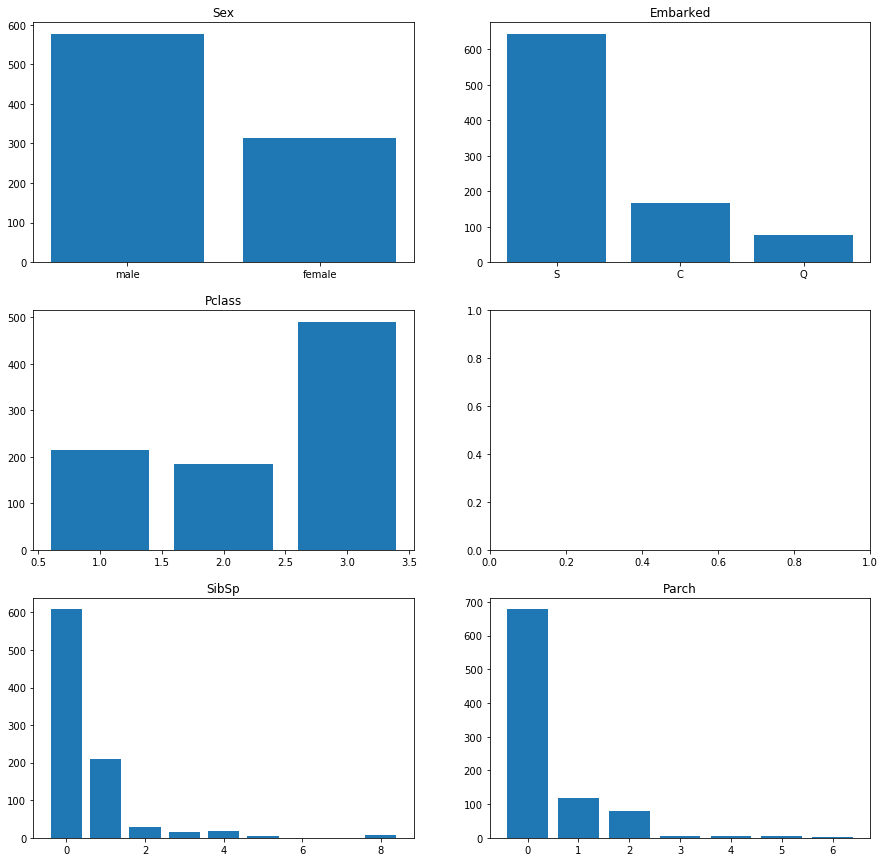

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axs= plt.subplots(3,2,figsize=(15,15))

axs[0,0].bar(data['Sex'].value_counts().index,data['Sex'].value_counts().values)
axs[0,0].set_title('Sex')
axs[0,1].bar(data['Embarked'].value_counts().index,data['Embarked'].value_counts().values)
axs[0,1].set_title('Embarked')
axs[1,0].bar(data['Pclass'].value_counts().index,data['Pclass'].value_counts().values)
axs[1,0].set_title('Pclass')

axs[2,0].bar(data['SibSp'].value_counts().index,data['SibSp'].value_counts().values)
axs[2,0].set_title('SibSp')
axs[2,1].bar(data['Parch'].value_counts().index,data['Parch'].value_counts().values)
axs[2,1].set_title('Parch')


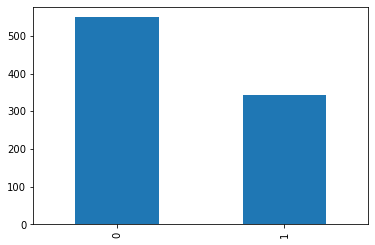

In [10]:
data['Survived'].value_counts().plot.bar()

In [11]:
data['Survived'].value_counts()/len(data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

* continuous variables - ( Age , Fare)

* box plot - to identify outliers
* histogram - to find skewness

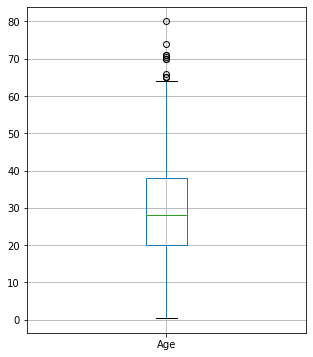

In [12]:
data.boxplot(column='Age',figsize=(5,6))

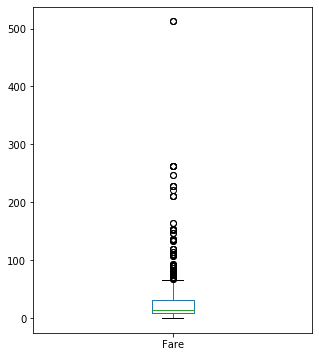

In [13]:
data['Fare'].plot.box(figsize=(5,6))

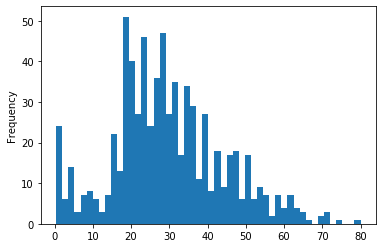

In [14]:
data['Age'].plot.hist(bins=50)

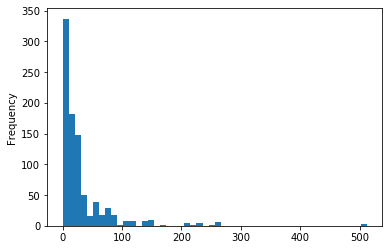

In [15]:
data['Fare'].plot.hist(bins=50)

## Data Manipulation

* fill the missing values
* change categories of few variables


#### 1 filling missing values

In [16]:
#finding varibles which have missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [18]:
data['Age'].isnull().sum()

0

In [19]:
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)

In [20]:
data['Cabin'].isnull().sum()

0

#### 2. changing categories 

In [21]:
data=data.astype({'Pclass':'object'})

In [22]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Bivariate analysis

#### hypothesis
* higher the ticket class , higher chances of survival because of facilities available (class 1 is higher)
* higher the age , lower the chances of survival
* higher the fare , higher chances of survival


In [23]:
data.pivot_table(index='Pclass',values='Survived',aggfunc='median')


,Survived
Pclass,
1,1
2,0
3,0


In [24]:
data.groupby('Pclass')['Survived'].median()

Pclass
1    1
2    0
3    0
Name: Survived, dtype: int64

higher the pclass , higher the survival rate

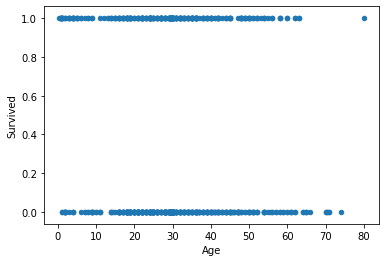

In [25]:
data.plot.scatter('Age','Survived')

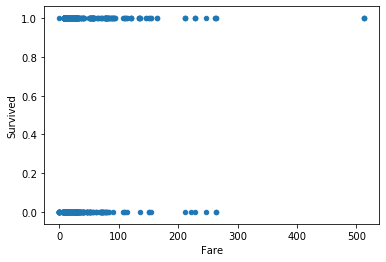

In [26]:
data.plot.scatter('Fare','Survived')

we note that there is no relation between ag , Fare and survival

let us see if there is any relation b/w sex and survival

In [27]:
data.pivot_table(index='Sex',values='Survived',aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


many females were survived when compared to men

In [28]:
data.pivot_table(index='SibSp',values='Survived',aggfunc='median')

,Survived
SibSp,
0,0
1,1
2,0
3,0
4,0
5,0
8,0


In [29]:
data.pivot_table(index='Parch',values='Survived',aggfunc='median')

,Survived
Parch,
0,0.0
1,1.0
2,0.5
3,1.0
4,0.0
5,0.0
6,0.0


## MODEL BUILDING

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [31]:
df=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
df=pd.get_dummies(df)
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [34]:
#segregating dependent and independent variables
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.shape,y.shape

((891, 12), (891,))

In [35]:
#scaling values
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
x_scaled=s.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [36]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state =35)

In [37]:
x_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
786,0.220910,0.000,0.000000,0.014631,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
636,0.396833,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
401,0.321438,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
811,0.484795,0.000,0.000000,0.047138,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
780,0.158080,0.000,0.000000,0.014110,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.673285,0.125,0.000000,0.050749,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
448,0.057552,0.250,0.166667,0.037590,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
33,0.824076,0.000,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
271,0.308872,0.000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score


In [39]:
lr=LR()
lr.fit(x_train,y_train)

ytrain_predict1=lr.predict(x_train)
k=accuracy_score(y_train,ytrain_predict1)
print('train score 1: ',k)


train score 1:  0.7979041916167665


In [40]:
y_predict1=lr.predict(x_test)
k=accuracy_score(y_test,y_predict1)
print('test score 1: ',k)

test score 1:  0.7847533632286996


### KNN CLASSIFIER

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score 

In [42]:
#choosing k value -elbow method

def Elbow(k):
    e=[]
    for i in k:
        a=KNN(n_neighbors=i) #number of neighbors-placing each k value
        a.fit(x_train,y_train) #fitting/plotting train data
        y_predict=a.predict(x_test)  #predicting test data
        score=f1_score(y_predict,y_test)  #evaluating   #me
        err=1-score
        e.append(err)
    return e 

In [43]:
k=range(6,20,2)
error=Elbow(k)

Text(0, 0.5, 'error')

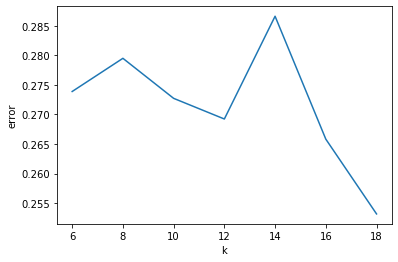

In [44]:
plt.plot(k,error)
plt.xlabel('k')
plt.ylabel('error')

In [68]:
a=KNN(16) #number of neighbors-placing each k value
a.fit(x_train,y_train) #fitting/plotting train data
y_predict2=a.predict(x_test)  #predicting test data
score=accuracy_score(y_predict2,y_test)  #evaluating
score

0.8116591928251121

### DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model=DecisionTreeClassifier(random_state=16)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [48]:
#changing max depth of tree
train=[]
test=[]
for i in range(1,10):
    model=DecisionTreeClassifier(random_state=16,max_depth=i)
    model.fit(x_train,y_train)
    y_train_predict=model.predict(x_train)
    train.append(accuracy_score(y_train,y_train_predict))
    y_test_predict=model.predict(x_test)
    test.append(accuracy_score(y_test,y_test_predict))


In [49]:
sample=pd.DataFrame({'max_depth':range(1,10),'train':train,'test':test})
sample.head()

,max_depth,train,test
0,1,0.790419,0.775785
1,2,0.790419,0.775785
2,3,0.821856,0.811659
3,4,0.830838,0.820628
4,5,0.851796,0.829596


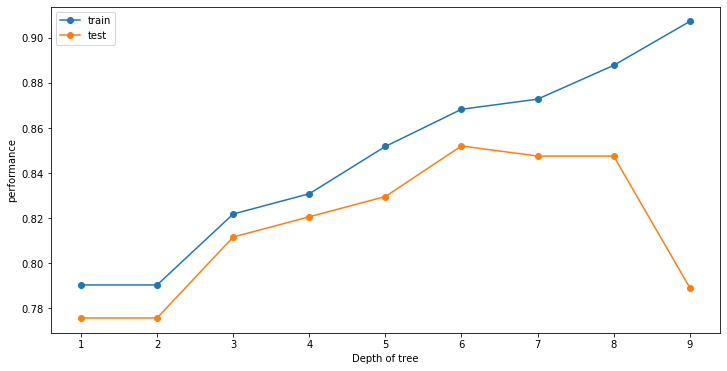

In [50]:
#plotting graph of max_depth vs train and max_depth vs test performance

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(sample['max_depth'],sample['train'], marker='o',label='train')
plt.plot(sample['max_depth'],sample['test'], marker='o',label='test')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [51]:
#from the above figure we choose max_depth as 6 because score of test variable is good when it is 6

model=DecisionTreeClassifier(random_state=16,max_depth=6)
model.fit(x_train,y_train)
y_train_predict=model.predict(x_train)
y_predict3=model.predict(x_test)

In [52]:
print(accuracy_score(y_train,y_train_predict))
print(accuracy_score(y_test,y_predict3))

0.8682634730538922
0.852017937219731


### TESTFILE

In [87]:
testf=pd.read_csv('test.csv')

#### missing values

In [88]:
testf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### datatypes

In [89]:
testf.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
testf=testf.astype({'Pclass':'object'})

In [91]:
testf.dtypes

PassengerId      int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
testf['Age'].fillna(testf['Age'].mean(),inplace=True)

In [95]:
testf['Fare'].fillna(testf['Fare'].mean(),inplace=True)

In [96]:
testf['Cabin'].fillna(testf['Cabin'].mode()[0],inplace=True)

In [97]:
testf.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [98]:
testfile=pd.get_dummies(testf.drop(['PassengerId','Name','Ticket','Cabin'],axis=1))
testfile.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [99]:
scaled=s.fit_transform(testfile)
xfile=pd.DataFrame(scaled,columns=testfile.columns)
xfile

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.452723,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.396975,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
414,0.512066,0.000,0.000000,0.212559,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,0.505473,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
416,0.396975,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [100]:
predict1=lr.predict(xfile)
predict2=a.predict(xfile)
predict3=model.predict(xfile)

In [101]:
alls=pd.DataFrame({'lr':predict1,'knn':predict2,'dt':predict3})
alls


,lr,knn,dt
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,1,1,0
...,...,...,...
413,0,0,0
414,1,1,1
415,0,0,0
416,0,0,0


In [102]:
m1_score= lr.score(x_test,y_test)
m2_score= a.score(x_test,y_test)
m3_score= model.score(x_test,y_test)
m1_score, m2_score, m3_score

(0.7847533632286996, 0.8116591928251121, 0.852017937219731)

In [103]:
alls['combine']=((1/6)*alls['lr'])+((2/6)*alls['knn'])+((3/6)*alls['dt'])
alls

,lr,knn,dt,combine
0,0,0,0,0.0
1,0,0,1,0.5
2,0,0,0,0.0
3,0,0,0,0.0
4,1,1,0,0.5
...,...,...,...,...
413,0,0,0,0.0
414,1,1,1,1.0
415,0,0,0,0.0
416,0,0,0,0.0


In [104]:
alls['final']=0
for i in range(len(alls)):
    if alls['combine'][i]<0.5:
        alls['final'][i]=0
    else:
        alls['final'][i]=1

c:\users\jyothi srilekha - pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jyothi srilekha - pc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
alls['final'].value_counts()

0    280
1    138
Name: final, dtype: int64

In [106]:
prediction1=pd.DataFrame({'PassengerId':testf.PassengerId,'Survived':alls['final']})
prediction1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
prediction1.to_csv('pred1.csv',index=False)